# Notebook 3: Machine Learning Básico
Aqui el grupo 3 aplicamos modelos de **clasificación y regresión** utilizando Scikit-learn:
- Modelos de clasificación
- Modelos de regresión
- Comparación de algoritmos y métricas


In [ ]:
# ===== CONFIGURACIÓN INICIAL DEL ENTORNO =====

# TensorFlow para revisar GPU
import tensorflow as tf
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# Instalar librerías adicionales si es necesario
!pip install seaborn plotly -q

# Importaciones estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_squared_error,
    r2_score
)

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Entorno configurado correctamente en Google Colab")


GPU disponible: []
Entorno configurado correctamente en Google Colab


## 1. Clasificación con el dataset Iris

Aquí usaremos el dataset **Iris** que es un clásico para un problema de clasificación multiclase porque permite predecir la especia de la flor a partir de medidas de sus pétalos y sépalos.


In [ ]:
from sklearn.datasets import load_iris

# Cargar datos
iris = load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
y_iris = pd.Series(iris.target, name='target')

# Mapa de clases
clases_iris = dict(enumerate(iris.target_names))

print("Dimensiones de X:", X_iris.shape)
print("Clases:", clases_iris)

X_iris.head()


Dimensiones de X: (150, 4)
Clases: {0: np.str_('setosa'), 1: np.str_('versicolor'), 2: np.str_('virginica')}


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Análisis rápido del dataset Iris

- Se evidencia el número de observaciones
- También el número de variables predictoras
- Clases a predecir
- Tipo de problema: **clasificación multiclase**


In [ ]:
# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris
)

# Estandarizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 1.3 Comparación de algoritmos de clasificación

Vamos a comparar:
- Una regresión logística
- (KNN) K-vecinos más cercanos
- Árbol de decisión
- Bosque aleatorio (Random Forest)

Mediante la Métrica principal: **accuracy**.


In [ ]:
modelos_clasificacion = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}

resultados_iris = []

for nombre, modelo in modelos_clasificacion.items():
    # Usamos los datos escalados para los modelos que lo necesitan
    if nombre in ["LogisticRegression", "KNN (k=5)"]:
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)
    else:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    resultados_iris.append({"Modelo": nombre, "Accuracy": acc})

df_resultados_iris = pd.DataFrame(resultados_iris)
df_resultados_iris


,Modelo,Accuracy
0,LogisticRegression,0.933333
1,KNN (k=5),0.933333
2,DecisionTree,0.933333
3,RandomForest,0.900000


In [ ]:
# Elegimos el mejor modelo según accuracy
mejor = df_resultados_iris.sort_values("Accuracy", ascending=False).iloc[0]
mejor


,0
Modelo,LogisticRegression
Accuracy,0.933333


Mejor modelo: LogisticRegression

Accuracy: 0.9333333333333333

Reporte de clasificación:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



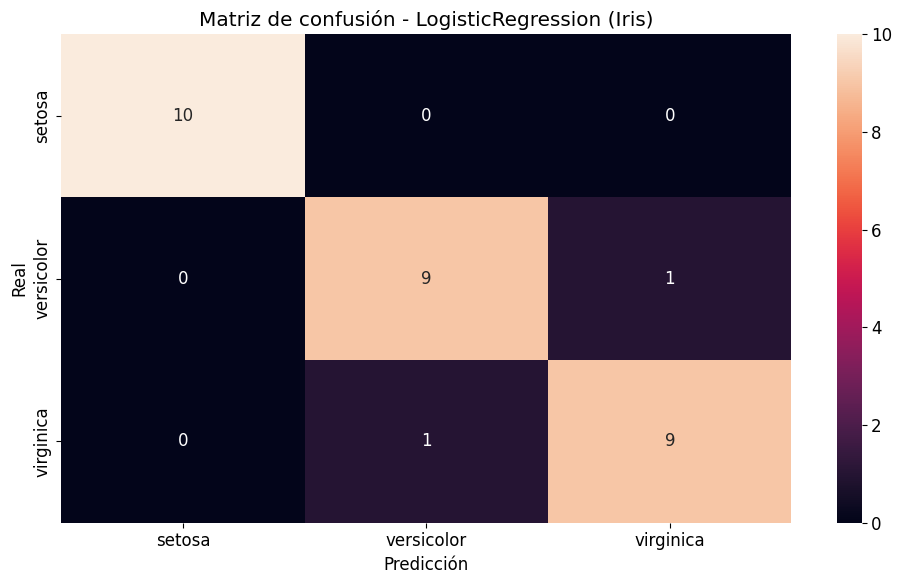

In [ ]:
nombre_mejor = mejor["Modelo"]
modelo_mejor = modelos_clasificacion[nombre_mejor]

# Reentrenar en todo el train con la configuración correcta
if nombre_mejor in ["LogisticRegression", "KNN (k=5)"]:
    modelo_mejor.fit(X_train_scaled, y_train)
    y_pred = modelo_mejor.predict(X_test_scaled)
else:
    modelo_mejor.fit(X_train, y_train)
    y_pred = modelo_mejor.predict(X_test)

print(f"Mejor modelo: {nombre_mejor}")
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title(f"Matriz de confusión - {nombre_mejor} (Iris)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


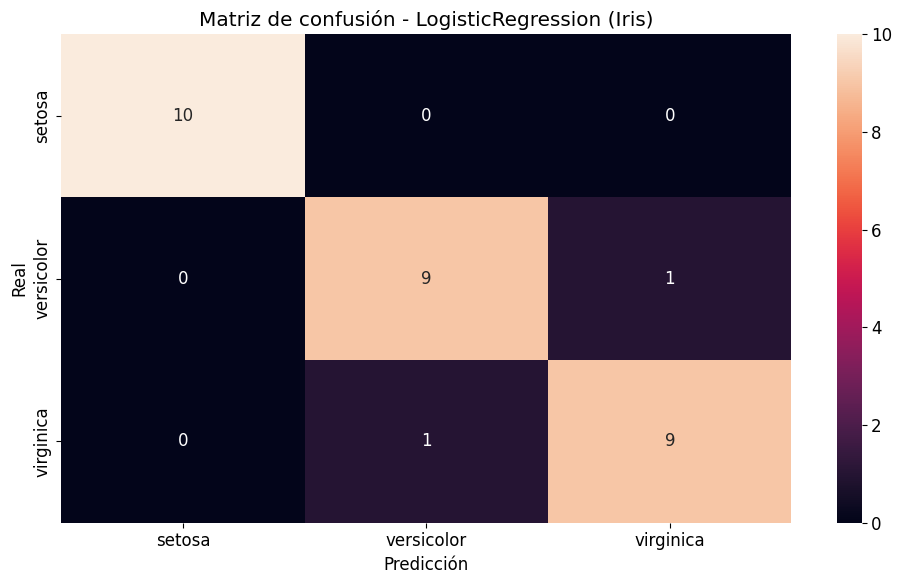

In [ ]:
import os
os.makedirs("images", exist_ok=True)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title(f"Matriz de confusión - {nombre_mejor} (Iris)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.savefig("images/03_iris_matriz_confusion.png", bbox_inches='tight')
plt.show()


## 2. Clasificación con el dataset Wine

Luego tomo el dataset **Wine**, que muestra otro problema clásico de clasificación, para predecir el tipo de vino en función de sus características químicas.


In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()
X_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
y_wine = pd.Series(wine.target, name='target')

print("Dimensiones de X_wine:", X_wine.shape)
print("Clases:", dict(enumerate(wine.target_names)))

X_wine.head()


Dimensiones de X_wine: (178, 13)
Clases: {0: np.str_('class_0'), 1: np.str_('class_1'), 2: np.str_('class_2')}


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42, stratify=y_wine
)

scaler_w = StandardScaler()
X_train_w_scaled = scaler_w.fit_transform(X_train_w)
X_test_w_scaled = scaler_w.transform(X_test_w)


In [ ]:
resultados_wine = []

for nombre, modelo in modelos_clasificacion.items():
    if nombre in ["LogisticRegression", "KNN (k=5)"]:
        modelo.fit(X_train_w_scaled, y_train_w)
        y_pred_w = modelo.predict(X_test_w_scaled)
    else:
        modelo.fit(X_train_w, y_train_w)
        y_pred_w = modelo.predict(X_test_w)

    acc = accuracy_score(y_test_w, y_pred_w)
    resultados_wine.append({"Modelo": nombre, "Accuracy": acc})

pd.DataFrame(resultados_wine)


,Modelo,Accuracy
0,LogisticRegression,0.972222
1,KNN (k=5),0.972222
2,DecisionTree,0.944444
3,RandomForest,1.000000


## 3. Regresión con dataset sintético tipo Boston Housing

Es importante mencionar que el dataset Boston original está obsoleto, entonces creo un dataset sintético de regresión que simula un problema tipo "precio de vivienda", con el objetivo de predecir un valor continuo (por ejemplo, precio de la casa).


In [ ]:
from sklearn.datasets import make_regression

# Crear dataset sintético
X_reg, y_reg = make_regression(
    n_samples=500,
    n_features=5,
    noise=15,
    random_state=42
)

columnas = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5']
X_reg = pd.DataFrame(X_reg, columns=columnas)
y_reg = pd.Series(y_reg, name='precio')

X_reg.head()


,feature_1,feature_2,feature_3,feature_4,feature_5
0,0.560919,-0.370011,-0.295480,-0.258796,1.598647
1,-1.024388,-0.926930,-0.252568,-0.059525,-3.241267
2,-2.650970,0.106430,1.091507,-0.254977,1.503993
3,-0.850520,-0.138456,-0.580523,-1.224298,-0.209023
4,-0.322680,-0.756795,-0.250833,-1.421811,1.501334


In [ ]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

scaler_r = StandardScaler()
X_train_r_scaled = scaler_r.fit_transform(X_train_r)
X_test_r_scaled = scaler_r.transform(X_test_r)


### 3.1 Comparación de modelos de regresión

Se comparan Modelos:
- Regresión lineal
- KNN Regressor
- Random Forest Regressor

A través de las siguientes Métricas:
- **RMSE (Root Mean Squared Error)**
- **R² (coeficiente de determinación)**


In [ ]:
modelos_regresion = {
    "LinearRegression": LinearRegression(),
    "KNNRegressor (k=5)": KNeighborsRegressor(n_neighbors=5),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=200, random_state=42)
}

resultados_reg = []

for nombre, modelo in modelos_regresion.items():
    # Todos con datos escalados para comparar mejor
    modelo.fit(X_train_r_scaled, y_train_r)
    y_pred_r = modelo.predict(X_test_r_scaled)

    rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
    r2 = r2_score(y_test_r, y_pred_r)

    resultados_reg.append({
        "Modelo": nombre,
        "RMSE": rmse,
        "R2": r2
    })

df_resultados_reg = pd.DataFrame(resultados_reg)
df_resultados_reg


,Modelo,RMSE,R2
0,LinearRegression,15.467102,0.980045
1,KNNRegressor (k=5),39.168784,0.872031
2,RandomForestRegressor,32.501635,0.911888


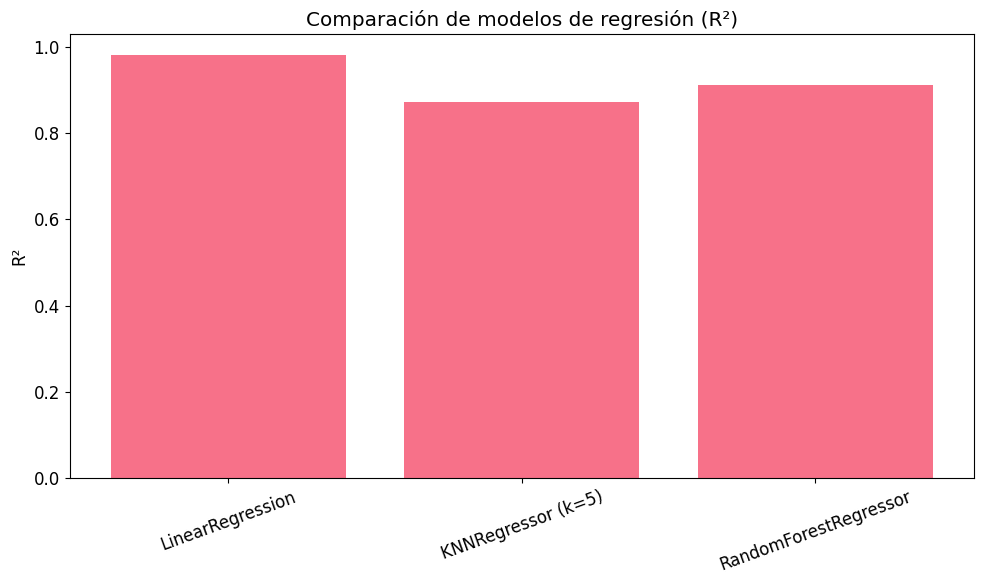

In [ ]:
plt.bar(df_resultados_reg["Modelo"], df_resultados_reg["R2"])
plt.ylabel("R²")
plt.title("Comparación de modelos de regresión (R²)")
plt.xticks(rotation=20)
plt.tight_layout()
os.makedirs("images", exist_ok=True)
plt.savefig("images/03_regresion_comparacion_R2.png", bbox_inches='tight')
plt.show()


## 4. Conclusiones del Notebook 3

En los ejercicios de clasificación con los datasets Iris y Wine, se observa que los modelos basados en conjuntos, especialmente Random Forest, logran un desempeño superior frente a algoritmos más simples como la regresión logística y esta ocurrencia se da porque pueden capturar relaciones más complejas entre las variables, aunque impliquen un mayor costo computacional.

Para el caso del análisis de regresión con el dataset sintético tipo Boston Housing, la regresión lineal sirve como un punto de partida confiable para establecer una línea base de comparación. Sin embargo, cuando la relación entre variables no es estrictamente lineal, modelos más flexibles como Random Forest Regressor muestran mejores resultados, reflejados tanto en un mayor R² como en un menor error RMSE, evidenciando la utilidad de considerar algoritmos no lineales cuando el patrón de los datos es más complejo.

Como últimpo punto, comparar diferentes modelos y métricas permite tomar decisiones informadas sobre cuál algoritmo se ajusta mejor a cada tipo de problema. Más allá de elegir un modelo “mejor”, el proceso demuestra la importancia de evaluar el contexto, la naturaleza del dataset y el equilibrio entre rendimiento y complejidad, el enfoque sistemático es clave para desarrollar soluciones de machine learning más eficientes y justificadas.


## 5. Guardar notebook en GitHub


In [1]:
from google.colab import auth
auth.authenticate_user()

!git config --global user.email "liz.castillo@uees.edu.ec"
!git config --global user.name "Liz Eliana Castillo Zamora"


In [2]:
# Ir a la carpeta raíz de Colab
%cd /content

# Borrar clon anterior si existe
!rm -rf UEES-IA-Semana1-Grupo3

# Clonar TU repositorio (ya con tu usuario real)
!git clone https://github.com/lizcastillo-glitch/UEES-IA-Semana1-Grupo3.git

# Entrar al repositorio
%cd UEES-IA-Semana1-Grupo3


/content
Cloning into 'UEES-IA-Semana1-Grupo3'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 39 (delta 13), reused 6 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (39/39), 503.73 KiB | 11.19 MiB/s, done.
Resolving deltas: 100% (13/13), done.
/content/UEES-IA-Semana1-Grupo3


In [3]:
!mkdir -p Notebooks


In [4]:
# Está dentro del repo
%cd /content/UEES-IA-Semana1-Grupo3

# Copiar el notebook desde /content a la carpeta Notebooks del repo
!cp /content/03_Machine_Learning_Basico.ipynb Notebooks/

# Verificar que está ahí (opcional pero útil)
!ls Notebooks

# Hacer commit y push
!git add .
!git commit -m "Añadir notebook 3 de Machine Learning básico"
!git push origin main


/content/UEES-IA-Semana1-Grupo3
cp: cannot stat '/content/03_Machine_Learning_Basico.ipynb': No such file or directory
01_Fundamentos_NumPy_Pandas.ipynb  02_Visualizacion_Datos.ipynb
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address


In [5]:
def save_to_github(notebook_name, commit_message="Actualizar notebook"):
    # Ir a raíz y entrar al repo
    %cd /content
    !rm -rf UEES-IA-Semana1-Grupo3
    !git clone https://github.com/lizcastillo-glitch/UEES-IA-Semana1-Grupo3.git
    %cd UEES-IA-Semana1-Grupo3

    !mkdir -p Notebooks
    !cp f"/content/{notebook_name}" Notebooks/

    !git add .
    !git commit -m "{commit_message}"
    !git push origin main
    print(f"{notebook_name} guardado en GitHub correctamente")

# Usar así al final del notebook 3:
save_to_github("03_Machine_Learning_Basico.ipynb",
               "Añadir notebook 3 de Machine Learning básico")


/content
Cloning into 'UEES-IA-Semana1-Grupo3'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 39 (delta 13), reused 6 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (39/39), 503.73 KiB | 10.95 MiB/s, done.
Resolving deltas: 100% (13/13), done.
/content/UEES-IA-Semana1-Grupo3
cp: cannot stat 'f/content/03_Machine_Learning_Basico.ipynb': No such file or directory
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address
03_Machine_Learning_Basico.ipynb guardado en GitHub correctamente
